<a href="https://colab.research.google.com/github/omidkhalafbeigi/Linear_Polynomial_Regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
files.upload()

Saving salary_data.csv to salary_data.csv


{'salary_data.csv': b'YearsExperience,Salary\r\n1.1,39343\r\n1.3,46205\r\n1.5,37731\r\n2.0,43525\r\n2.2,39891\r\n2.9,56642\r\n3.0,60150\r\n3.2,54445\r\n3.2,64445\r\n3.7,57189\r\n3.9,63218\r\n4.0,55794\r\n4.0,56957\r\n4.1,57081\r\n4.5,61111\r\n4.9,67938\r\n5.1,66029\r\n5.3,83088\r\n5.9,81363\r\n6.0,93940\r\n6.8,91738\r\n7.1,98273\r\n7.9,101302\r\n8.2,113812\r\n8.7,109431\r\n9.0,105582\r\n9.5,116969\r\n9.6,112635\r\n10.3,122391\r\n10.5,121872\r\n'}

In [ ]:
dataset = list()

In [ ]:
for x in range(-50, 50):
  dataset.append((x, 3 * np.power(x, 2) + 4 * x + 5))

In [ ]:
drive.mount('content')

Mounted at content


In [ ]:
dataset = np.array(dataset)

In [ ]:
df = pd.read_csv("salary_data.csv")
X = df.iloc[:,:-1].values 
y = df.iloc[:,1].values

In [ ]:
def regression(X, y, degree, n_iter=10000, learning_rate=0.000001):
  X = X.reshape(-1, 1)
  X_train = np.ones(X.shape[0]).reshape(-1, 1)
  y = np.array(y).reshape(-1, 1)

  for d in range(1, degree + 1):
    X_train = np.hstack((X_train, np.power(X, d)))

  X = X_train
  
  m = X.shape[0]
  w = np.zeros((X.shape[1])).reshape(-1, 1)
  """
  print(m)
  print(X)
  print(w)
  print('------------------------')
  """
  
  for _ in range(n_iter):
    error = np.dot(X, w) - y
    for w_index in range(w.shape[0]):
      # print(error)
      # print(X[:, w_index].reshape(-1, 1))
      # print(np.sum(error * X[:, w_index].reshape(-1, 1)) * (2/m) * learning_rate)
      # print('////////////////////')
      w[w_index] -= (learning_rate * ((2 / m) * np.sum(error * X[:, w_index].reshape(-1, 1))))
      
  return w
  

In [ ]:
# w = regression(X, y, 1, n_iter=1000, learning_rate=0.01)
w = regression(dataset[:, 0], dataset[:, 1], 2, n_iter=10000, learning_rate=0.0000001)

In [ ]:
output = w[0] + (w[1] * dataset[:, 0]) + (w[2] * np.power(dataset[:, 0], 2))

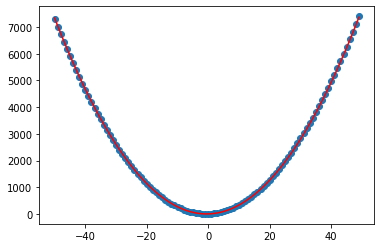

In [ ]:
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.plot(dataset[:, 0], output, 'red')
plt.show()